# Gamma Tuning

In [59]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name 
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'].to_markdown())
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

In [96]:
import joblib 
gamma_tune_dict = joblib.load('../not_on_git/gamma_tune_dict.pkl')
gamma_tune_dict

{0.08: <__main__.make_model at 0x7fecd8d19e80>,
 0.09: <__main__.make_model at 0x7fecd1ed5240>,
 0.0: <__main__.make_model at 0x7fecd1ed9a58>,
 0.01: <__main__.make_model at 0x7fecd1d03d30>,
 0.02: <__main__.make_model at 0x7fecd1c9a5c0>,
 0.03: <__main__.make_model at 0x7fecd1c2add8>,
 0.04: <__main__.make_model at 0x7fecd1bbf630>,
 0.05: <__main__.make_model at 0x7fecd1acfe48>,
 0.06: <__main__.make_model at 0x7fecd1a6b6a0>,
 0.07: <__main__.make_model at 0x7fecd19fceb8>,
 0.065: <__main__.make_model at 0x7fecd1917710>,
 0.075: <__main__.make_model at 0x7fecd17479e8>,
 0.085: <__main__.make_model at 0x7fecd166e2b0>,
 0.0775: <__main__.make_model at 0x7fecd1676a90>,
 0.0725: <__main__.make_model at 0x7fecd14a6d68>,
 0.1: <__main__.make_model at 0x7fecd143f5f8>,
 0.095: <__main__.make_model at 0x7fecd1351e10>,
 0.0675: <__main__.make_model at 0x7fecd1115160>}

In [107]:

f1 , pres  , recall , mcc = []  , [] , [] , [] 
gamma = []
for el in gamma_tune_dict.keys():
    f1.append(gamma_tune_dict[el].result['f1'])
    pres.append(gamma_tune_dict[el].result['precision'])
    recall.append(gamma_tune_dict[el].result['recall'])
    mcc.append(gamma_tune_dict[el].result['mcc'])
    gamma.append(el)
gamma_score = pd.DataFrame({
    'gamma' : gamma ,
    'MCC' : mcc ,
    'precision' : pres , 
    'recall' : recall , 
    'f1 score' : f1 ,
}).sort_values(by='gamma').reset_index(drop=True)
gamma_score = gamma_score[gamma_score['gamma']<0.098]
gamma_score = gamma_score[gamma_score['gamma']!=0.0675]
gamma_score

,gamma,MCC,precision,recall,f1 score
0,0.0000,0.902354,0.825647,0.741914,0.775135
1,0.0100,0.903654,0.815030,0.744892,0.772984
2,0.0200,0.904010,0.814175,0.750969,0.777873
3,0.0300,0.908147,0.827579,0.773332,0.797430
4,0.0400,0.907496,0.807328,0.764431,0.783577
5,0.0500,0.905469,0.806781,0.771818,0.787540
6,0.0600,0.906925,0.812620,0.790910,0.800966
7,0.0650,0.906818,0.806899,0.788814,0.796865
9,0.0700,0.911602,0.813208,0.799014,0.805188
10,0.0725,0.904418,0.796098,0.788023,0.790790


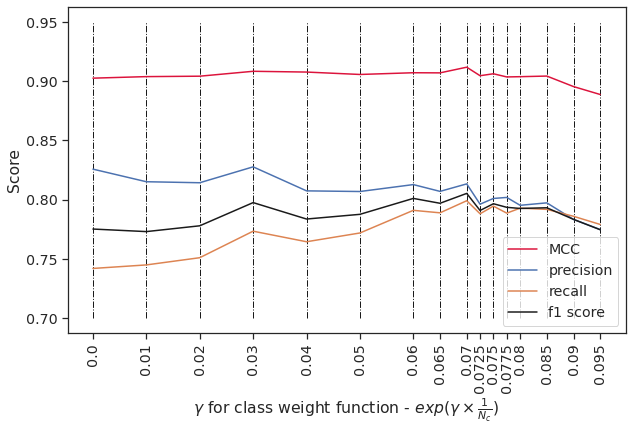

In [121]:
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="ticks")
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,6))

ax.plot(gamma_score['gamma'] , gamma_score['MCC'] , label = 'MCC' , color='crimson')
ax.plot(gamma_score['gamma'] , gamma_score['precision'] , label = 'precision')
ax.plot(gamma_score['gamma'] , gamma_score['recall'] , label = 'recall') 
ax.plot(gamma_score['gamma'] , gamma_score['f1 score'] , label = 'f1 score' , color='k') 
ax.set_xticks(gamma_score['gamma'] , )
ax.set_xticklabels(gamma_score['gamma'], rotation=90)
ax.vlines(gamma_score['gamma'] , ymin = 0.7 , ymax=0.95 , linewidth=1 , color='k' , alpha=1, linestyle='-.')

#ax2 = ax.twinx()
ax.grid(False)
ax.set_xlabel(r'$\gamma$ for class weight function - $exp(\gamma\times\frac{1}{N_c} )$')
ax.set_ylabel('Score')
plt.legend()
plt.savefig('final_plots/gamma_tuning.jpg')
plt.show()

In [122]:
gamma_tune_dict[0.07].result

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2769
 AGN           2416
 YSO           1177
 HMXB           740
 ULX            210
 CV             157
 LMXB           122
 PULSAR         112,
 'balanced_accuracy': 0.7990135039182039,
 'accuracy': 0.9347007659353499,
 'precision': 0.8132076064780758,
 'recall': 0.7990135039182039,
 'f1': 0.805187821761211,
 'mcc': 0.911602433539088,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.974113         0.965646  0.969861
 CV          0.584337         0.617834  0.600619
 HMXB        0.913102         0.922973  0.918011
 LMXB        0.804196         0.942623  0.867925
 PULSAR      0.485149         0.437500  0.460094
 STAR        0.957348         0.964608  0.960964
 ULX         0.715640         0.719048  0.717340
 YSO         0.958225         0.935429  0.946690,
 'res

# Calculate scores

In [1]:
import pandas as pd 
import numpy as np 
from utilities import get_score

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


In [16]:
df = pd.read_csv('temp_res_comp/train_prob/mode_GB.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/mode_RF.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/none_lightGBM.csv' , index_col='name')
df 

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J181044.4-260901,CV,PULSAR,0.494503,0.013341,0.393068,0.016631,0.007113,0.494503,0.044733,0.011582,0.019030
2CXO J104409.2-595904,YSO,YSO,0.781595,0.007102,0.032291,0.030874,0.011654,0.031463,0.087751,0.017270,0.781595
2CXO J224731.7+033549,AGN,PULSAR,0.360628,0.261291,0.057642,0.112283,0.009154,0.360628,0.028470,0.101648,0.068883
2CXO J053536.6-051850,STAR,STAR,0.909449,0.005718,0.039022,0.015799,0.010959,0.012286,0.909449,0.004848,0.001918
2CXO J201657.8-704703,ULX,PULSAR,0.479177,0.017152,0.394054,0.060770,0.014311,0.479177,0.016743,0.011379,0.006413
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J123613.4+275150,AGN,AGN,0.899162,0.899162,0.039616,0.005901,0.001148,0.001685,0.003309,0.048364,0.000816
2CXO J161436.5-223031,PULSAR,PULSAR,0.458746,0.005546,0.439247,0.018749,0.011930,0.458746,0.006238,0.055581,0.003963
2CXO J004142.9-091915,STAR,STAR,0.982564,0.005121,0.001937,0.008805,0.000297,0.000010,0.982564,0.001242,0.000024


In [17]:
get_score([df] , sc_average='macro')

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2633
 AGN           2184
 YSO           1182
 HMXB           786
 ULX            338
 CV             239
 PULSAR         196
 LMXB           145,
 'balanced_accuracy': 0.7951883707695815,
 'accuracy': 0.8908217577567181,
 'precision': 0.7099381876425648,
 'recall': 0.7951883707695815,
 'f1': 0.7404955122619998,
 'mcc': 0.8560587678459877,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.892693         0.978938  0.933828
 CV          0.620482         0.430962  0.508642
 HMXB        0.875668         0.833333  0.853977
 LMXB        0.804196         0.793103  0.798611
 PULSAR      0.554455         0.285714  0.377104
 STAR        0.915771         0.970376  0.942283
 ULX         0.758294         0.473373  0.582878
 YSO         0.939948         0.913706  0.926641}

# Feature Feature Correlation

# Missing features

In [123]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [124]:
from utilities import deets 
from choices import param_dict

In [125]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [126]:
x_all = x.copy()
x_all.insert(0 , 'class' , y.to_list())
x_all

,class,gal_b2,gal_l2,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,h-csc,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,2.487849,8.497420,2.632625,0.000904,5.046627,0.00,8.195828,1.0,1.499984e-09,...,4.784757,2.894845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,CV,4.327881,9.393618,9.999996,0.017956,1.995495,10.00,8.236122,0.0,1.102579e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,CV,2.488746,8.496825,9.999844,0.001090,6.298061,7.50,8.909807,1.0,8.495617e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,CV,2.489281,8.496673,8.302307,0.026969,8.383567,6.25,9.841010,2.0,9.022461e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,CV,2.487878,8.497314,5.005657,0.000442,7.272317,3.75,9.850364,2.0,1.416053e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,AGN,0.888957,8.713766,NaN,NaN,3.074255,NaN,0.408315,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,YSO,5.054270,2.262789,NaN,NaN,3.363494,NaN,8.996703,0.0,NaN,...,7.935403,4.953001,7.119828,NaN,6.445148,NaN,6.807378,5.048179,NaN,NaN
2CXO J131747.5+411745,AGN,9.176328,2.880393,NaN,NaN,1.768983,NaN,2.472603,0.0,9.654383e-08,...,8.002279,2.122574,NaN,5.055027,NaN,4.955872,NaN,NaN,NaN,6.731328


In [130]:
miss = []
for cl in y.unique():
#    cl = 'AGN'
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    miss.append((1-temp.isna().sum(axis=0) / len(temp)).to_frame(name=cl))
miss = pd.concat(miss , axis=1)
miss.insert(0 , 'overall' , (1-x.isna().sum(axis=0) / len(x)).to_list())
miss

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
gal_b2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
gal_l2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
var_inter_prob_b,0.496560,0.481928,0.547312,0.716578,0.554395,0.464455,0.317745,0.951049,0.495050
var_inter_sigma_b,0.496560,0.481928,0.547312,0.716578,0.554395,0.464455,0.317745,0.951049,0.495050
var_intra_prob_b,0.948851,0.795181,0.922222,0.965241,0.947781,0.990521,0.986639,0.874126,0.950495
var_inter_index_b,0.496560,0.481928,0.547312,0.716578,0.554395,0.464455,0.317745,0.951049,0.495050
kp_intra_prob_b,0.948851,0.795181,0.922222,0.965241,0.947781,0.990521,0.986639,0.874126,0.950495
var_intra_index_b,0.948851,0.795181,0.922222,0.965241,0.947781,0.990521,0.986639,0.874126,0.950495
h-csc,0.742568,0.819277,0.717563,0.838235,0.634465,0.819905,0.774113,0.923077,0.663366
b-csc,0.984811,0.969880,0.970609,0.990642,0.997389,0.995261,0.993319,0.986014,0.990099


In [131]:
from choices import param_dict 
param_dict['CSC inter obs variability'] = ['var_inter_prob_b' , 'var_inter_sigma_b' , 'var_inter_index_b']
param_dict['CSC intra obs variability'] = ['var_intra_prob_b' , 'kp_intra_prob_b' , 'var_intra_index_b']
comb = ['WISE' , '2MASS' , 'GAIA' , 'SDSS' , 'GALEX' ,'CSC inter obs variability','CSC intra obs variability' ]
comb_df = []
for c in comb:
    comb_df.append(miss.loc[param_dict[c]].mean().to_frame(name=c).T)
comb_df = pd.concat(comb_df)
comb_df

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
WISE,0.412307,0.030120,0.365591,0.044452,0.225413,0.014218,0.768163,0.076923,0.049505
2MASS,0.553507,0.158635,0.913262,0.071301,0.854656,0.030016,0.263744,0.048951,0.089109
GAIA,0.599766,0.367470,0.800358,0.167112,0.583116,0.123223,0.605428,0.181818,0.287129
SDSS,0.237648,0.062651,0.037419,0.022193,0.000174,0.048341,0.705136,0.000000,0.000000
GALEX,0.171881,0.048193,0.044624,0.002674,0.000000,0.009479,0.492902,0.034965,0.019802
CSC inter obs variability,0.496560,0.481928,0.547312,0.716578,0.554395,0.464455,0.317745,0.951049,0.495050
CSC intra obs variability,0.948851,0.795181,0.922222,0.965241,0.947781,0.990521,0.986639,0.874126,0.950495


In [135]:
sep_col = ['h-csc' ,'b-csc' , 'm-csc' , 'u-csc' ,'0p3_8_csc' ,'B-R' , 'G-J' , 'G-W2' , 'Bp-H' , 'Bp-W3' , 'Rp-K' , 'J-H' , 'J-W1' , 'W1-W2' , '24_microns_(MIPS)']
sep_df = miss.loc[sep_col]
sep_df

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
h-csc,0.742568,0.819277,0.717563,0.838235,0.634465,0.819905,0.774113,0.923077,0.663366
b-csc,0.984811,0.969880,0.970609,0.990642,0.997389,0.995261,0.993319,0.986014,0.990099
m-csc,0.951707,0.963855,0.949462,0.967914,0.904265,0.985782,0.972860,0.888112,0.930693
u-csc,0.956900,0.963855,0.907168,0.982620,0.994778,0.976303,0.985386,0.986014,0.940594
0p3_8_csc,0.829417,0.686747,0.828315,0.882353,0.794604,0.867299,0.850939,0.601399,0.831683
B-R,0.599766,0.367470,0.800358,0.167112,0.583116,0.123223,0.605428,0.181818,0.287129
G-J,0.425159,0.096386,0.746595,0.048128,0.542211,0.014218,0.209603,0.034965,0.069307
G-W2,0.283786,0.018072,0.263799,0.032086,0.119234,0.014218,0.531106,0.048951,0.039604
Bp-H,0.425159,0.096386,0.746595,0.048128,0.542211,0.014218,0.209603,0.034965,0.069307
Bp-W3,0.284305,0.018072,0.264516,0.030749,0.119234,0.014218,0.532359,0.048951,0.039604


In [138]:
miss_comb_df = pd.concat([sep_df , comb_df]).sort_values(by='overall' , ascending=False)
miss_comb_df

,overall,CV,STAR,HMXB,YSO,ULX,AGN,LMXB,PULSAR
b-csc,0.984811,0.969880,0.970609,0.990642,0.997389,0.995261,0.993319,0.986014,0.990099
u-csc,0.956900,0.963855,0.907168,0.982620,0.994778,0.976303,0.985386,0.986014,0.940594
m-csc,0.951707,0.963855,0.949462,0.967914,0.904265,0.985782,0.972860,0.888112,0.930693
CSC intra obs variability,0.948851,0.795181,0.922222,0.965241,0.947781,0.990521,0.986639,0.874126,0.950495
0p3_8_csc,0.829417,0.686747,0.828315,0.882353,0.794604,0.867299,0.850939,0.601399,0.831683
h-csc,0.742568,0.819277,0.717563,0.838235,0.634465,0.819905,0.774113,0.923077,0.663366
B-R,0.599766,0.367470,0.800358,0.167112,0.583116,0.123223,0.605428,0.181818,0.287129
GAIA,0.599766,0.367470,0.800358,0.167112,0.583116,0.123223,0.605428,0.181818,0.287129
2MASS,0.553507,0.158635,0.913262,0.071301,0.854656,0.030016,0.263744,0.048951,0.089109
J-H,0.548488,0.156627,0.913262,0.070856,0.854656,0.028436,0.248017,0.048951,0.089109


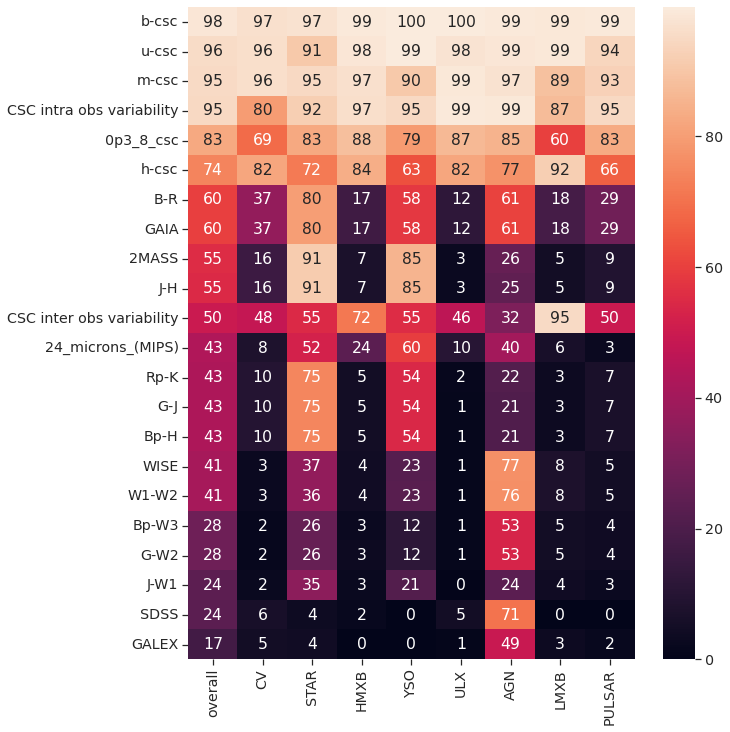

In [150]:
import seaborn as sns
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
sns.heatmap(miss_comb_df*100 , ax=ax , annot=True , fmt='.0f')
plt.xticks(rotation=90)
plt.show()

In [43]:
print(miss.to_latex(float_format="%.2f" , longtable=False))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   CV &  STAR &  HMXB &  YSO &  ULX &  AGN &  LMXB &  PULSAR \\
\midrule
gal\_b2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
gal\_l2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
var\_inter\_prob\_b  & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_inter\_sigma\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_intra\_prob\_b  & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_inter\_index\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
kp\_intra\_prob\_b   & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_intra\_index\_b & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
h-csc             & 0.18 &  0.28 &  0.16 & 0.37 & 0.18 & 0.23 &  0.08 &    0.34 \\
b-csc             & 0.03 &  0.03 &  0.01 & 0.00 & 0.00 & 0.01 &  0.01 &    0.01 \\
m-csc             & 0.04 &  0.05 &  0

In [24]:
miss = []
for cl in y.unique():
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    x_all.isna().sum(axis=0) / len(x_all).to_df()

gal_b2               0.000000
gal_l2               0.000000
var_inter_prob_b     0.503440
var_inter_sigma_b    0.503440
var_intra_prob_b     0.051149
var_inter_index_b    0.503440
kp_intra_prob_b      0.051149
var_intra_index_b    0.051149
h-csc                0.257432
b-csc                0.015189
m-csc                0.048293
s-csc                0.037128
u-csc                0.043100
0p3_8_csc            0.170583
FUV                  0.829287
NUV                  0.826951
u-sdss               0.765027
g-sdss               0.755420
r-sdss               0.763469
i-sdss               0.763209
z-sdss               0.764637
W1                   0.589121
W2                   0.588732
W3                   0.588212
W4                   0.584707
24_microns_(MIPS)    0.566792
J                    0.451383
H                    0.451512
K                    0.436583
G                    0.400234
Bp                   0.400234
Rp                   0.400234
B-R                  0.400234
G-J       